<a href="https://colab.research.google.com/github/OSegun/Deep-Learning-Projects/blob/main/Dog_%26_Cat_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog & Cat Classification With Custom CNN model architechure And VGG16 pre-trained model


The Dataset can be downloaded from kaggle website https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
# Importing all necessary libaries

import os
from zipfile import ZipFile
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model
tf.__version__

'2.17.0'

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /tmp/cats_and_dogs_filtered.zip

--2024-09-26 20:25:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.207, 173.194.203.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   188MB/s    in 0.3s    

2024-09-26 20:25:30 (188 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Creating directories for our training and test dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')


In [ ]:
print(train_dir)

/tmp/cats_and_dogs_filtered/train


In [ ]:
# Data Preprocessing

# Preprocessing the training dataset

train_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                               zoom_range = 0.2, horizontal_flip = True)

train_set = train_gen.flow_from_directory(train_dir, target_size = (64, 64),
                                          batch_size = 32, class_mode = 'binary')



Found 2000 images belonging to 2 classes.


In [ ]:
# Preprocessing the training dataset

test_gen = ImageDataGenerator(rescale = 1./255)
test_set = test_gen.flow_from_directory(test_dir, target_size = (64, 64),
                                          batch_size = 32, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [ ]:
# Building the CNN


# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
# regularizers and linear activation function as a used case for SVM binary model
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,545 (1.04 MB)

 Trainable params: 272,545 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(x = train_set, validation_data = test_set, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.5061 - loss: 1.0075 - val_accuracy: 0.5000 - val_loss: 0.9956
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 164ms/step - accuracy: 0.5168 - loss: 0.9849 - val_accuracy: 0.5730 - val_loss: 0.9128
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - accuracy: 0.5828 - loss: 0.8662 - val_accuracy: 0.5710 - val_loss: 0.8956
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - accuracy: 0.6089 - loss: 0.8131 - val_accuracy: 0.6620 - val_loss: 0.7823
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 198ms/step - accuracy: 0.6703 - loss: 0.7341 - val_accuracy: 0.6590 - val_loss: 0.7784
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.6628 - loss: 0.7171 - val_accuracy: 0.6950 - val_loss: 0.7320
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 181ms/step - accuracy: 0.6769 - loss: 0.6997 - val_accuracy: 0.6900 - val_loss: 0.7140
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.7075 - loss: 0.6666 - val_accuracy: 0.665

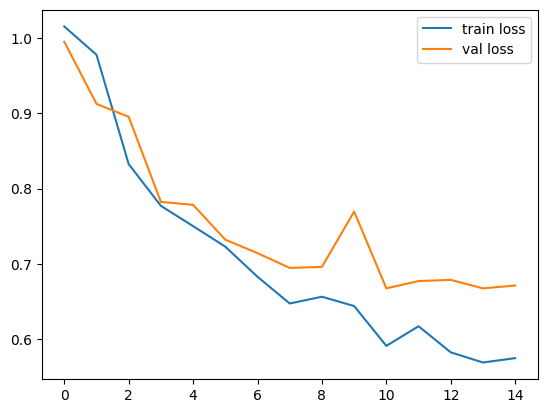

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



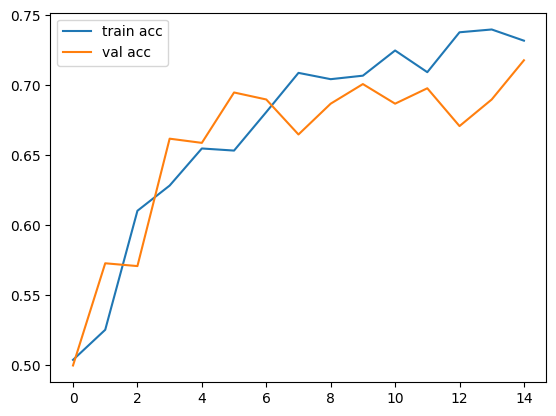

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
# Vgg16 model
vgg= VGG16(input_shape=(64,64,3), include_top=False, weights="imagenet")
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
vgg_model = Sequential()
vgg_model.add(vgg)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(256, activation="relu"))
vgg_model.add(layers.Dense(1, activation="sigmoid"))

In [ ]:
vgg_model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history = vgg_model.fit(train_set, steps_per_epoch=15, epochs=15, verbose=1, validation_data=test_set)

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 110s 8s/step - accuracy: 0.5148 - loss: 1.3913 - val_accuracy: 0.7080 - val_loss: 0.5597
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 109s 8s/step - accuracy: 0.6631 - loss: 0.6305 - val_accuracy: 0.7220 - val_loss: 0.5350
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step - accuracy: 0.7172 - loss: 0.5308 - val_accuracy: 0.7120 - val_loss: 0.5529
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 107s 8s/step - accuracy: 0.6922 - loss: 0.5645 - val_accuracy: 0.7620 - val_loss: 0.4914
Epoch 5/15
 3/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8597 - loss: 0.4044

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 56s 4s/step - accuracy: 0.8019 - loss: 0.4566 - val_accuracy: 0.7000 - val_loss: 0.5760
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 122s 8s/step - accuracy: 0.6488 - loss: 0.7030 - val_accuracy: 0.7230 - val_loss: 0.5296
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.7692 - loss: 0.4943 - val_accuracy: 0.7470 - val_loss: 0.5113
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 77s 5s/step - accuracy: 0.7079 - loss: 0.5722 - val_accuracy: 0.7310 - val_loss: 0.5287
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.7231 - loss: 0.5363 - val_accuracy: 0.7880 - val_loss: 0.4584
Epoch 10/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.8045 - loss: 0.4206 - val_accuracy: 0.7910 - val_loss: 0.4591
Epoch 11/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 75s 5s/step - accuracy: 0.7034 - loss: 0.5451 - val_accuracy: 0.7990 - val_loss: 0.4485
Epoch 12/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - accuracy: 0.7686 - loss: 0.4919 - val_accuracy: 0.6660 - val_loss: 0.6501

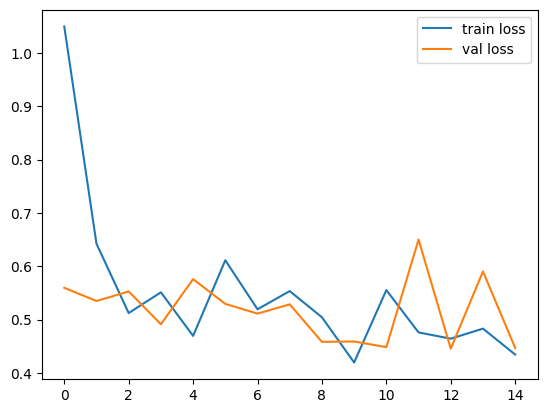

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



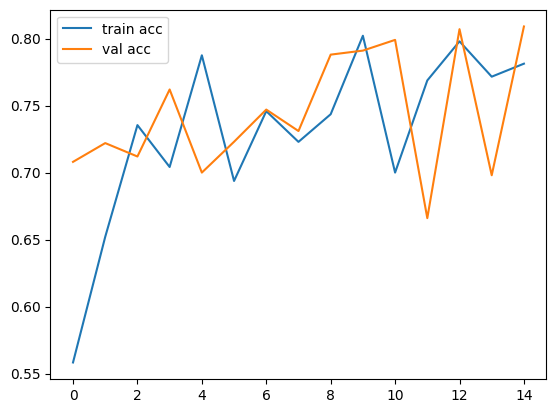

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')